<a href="https://colab.research.google.com/github/laaibaakmal/dotfiles/blob/master/3_Decision_trees(HW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forests

### Can we predict the quartz content of sand, at any point on Earth?

## Decision Trees

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests, which are among the most powerful algorithms available today.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # restrict dataset to petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Decision trees require very little data preparation. They don't require feature scaling or centering at all.

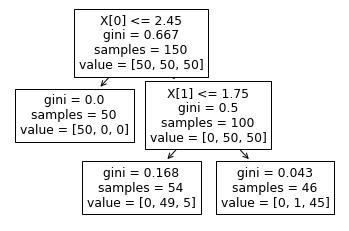

In [2]:
from sklearn import tree
tree.plot_tree(tree_clf);

Install `graphviz` with:

`conda install -c conda-forge python-graphviz`

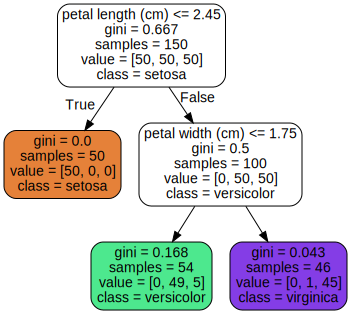

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

A node's `samples` attribute counts how many training instances it applies to.

A nodes' `value` tells you how many training instances of each class this node applies to: for example, the bottom right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.

A nodes's `gini` attribute meaures its impurity: a node is "pure" if all training instances in it belong to the same class. It is computed as follows:

$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 $,

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

For example, the depth-2 left node has a `gini` score equal to $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$.

Scikit-Learn uses the **Classification and Regression Tree (CART)** algorithm to train Decision Trees. It works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$. To choose $k$ and $t_k$, it searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function that needs to be minimized looks like this:

$ J(k, t_k)  = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops once it reaches the maximum depth or if it cannot find a split that will reduce impurity.

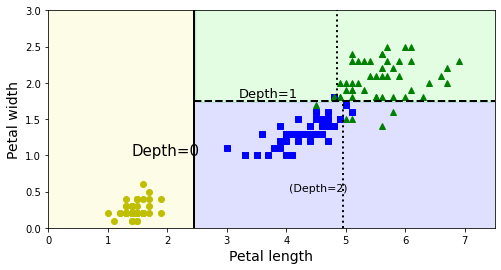

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

fig = plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11);

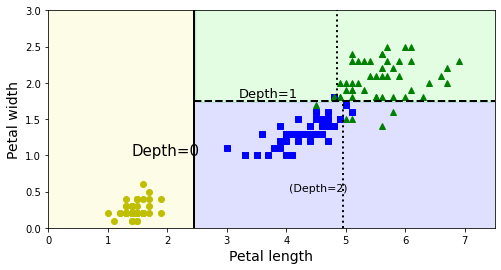

In [5]:
fig

Decision Trees are intuitive, and their decisions are easy to interpret (**white box models**). In contrast, Random Forests or neural networks are generally considered **black box models**; it is usually hard to explain why the predictions were made. Decision Trees provide simple classification rules that can even be applied manually if need be.

Decision Trees make very few assumptions about the training data; if left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely; most likely overfitting it. To avoid overfitting, we need restrict the tree's freedom during training (regularization). The most obvious way to do this with Decision Trees is to restrict the maximum depth of the tree (the `max_depth` hyperparameter). Other parameters that restrict the shape of the tree: `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `max_features`. Increasing `min_*` or reducing `max_*` parameters will regularize the model.

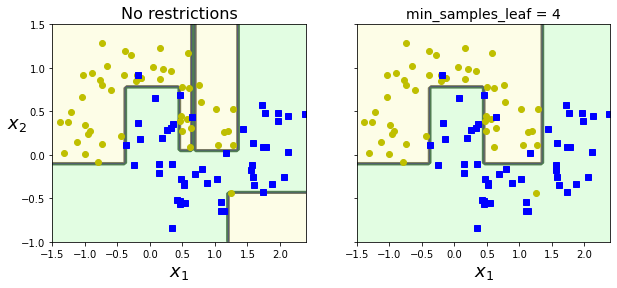

In [6]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("");

## Predicting classes and class probabilities

A Decision tree can estimate the probability that an instance belongs to a particular class $k$. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances in this node. For example, if you found a flower whose petals are 5 cm long and 1.5 cm wide, the corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 9% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54).

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

## Sensitivity to training set details

Decision Treea are simple to understand and interpret, easy to use, versatile, and powerful; but they do have a few limitations. First, Decision Trees rely on orthogonal decision boundaries, and this makes them sensitive to training set rotation.

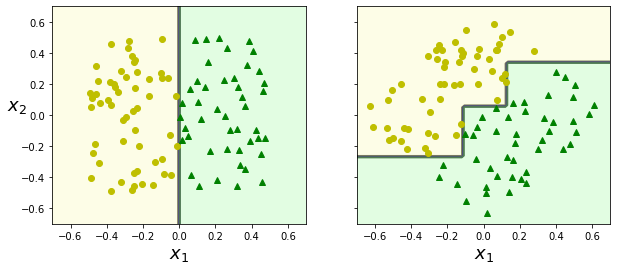

In [9]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix) 

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("");

More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data. For example, if you just remove the widest Iris versicolor from the iris dataset and train a new Decision Tree, you may get the tree below. In fact, since the training algorithm used by Scikit-Learn is stochastic, you may get very different models even on the same training data.

In [10]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [11]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Text(1.0, 1.8, 'Depth=1')

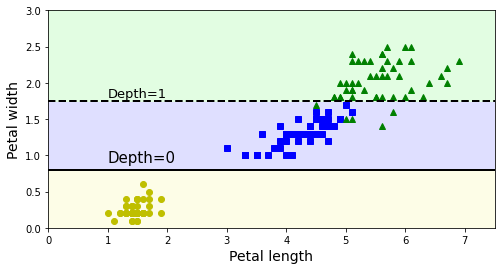

In [12]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

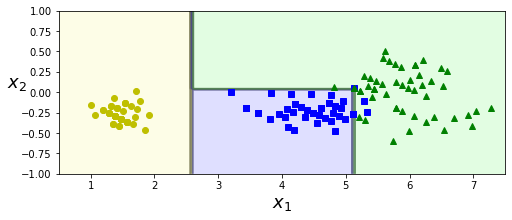

In [13]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False);

# Regression trees

Decision Trees are also capable of performing regression tasks. Let's build a regression tree using Scikit-Learn's `DecisionTreeRegressor` class.

In [14]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

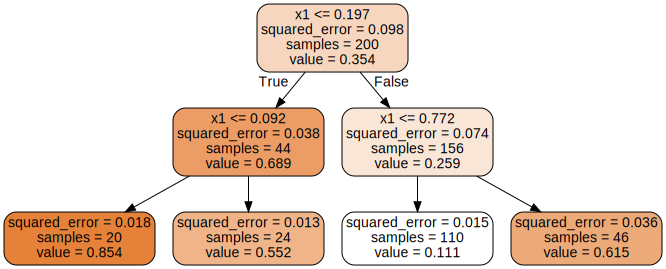

In [16]:
export_graphviz(
        tree_reg,
        out_file="reg_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file("reg_tree.dot")

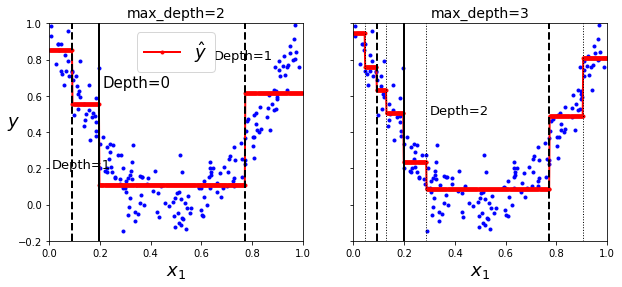

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14);

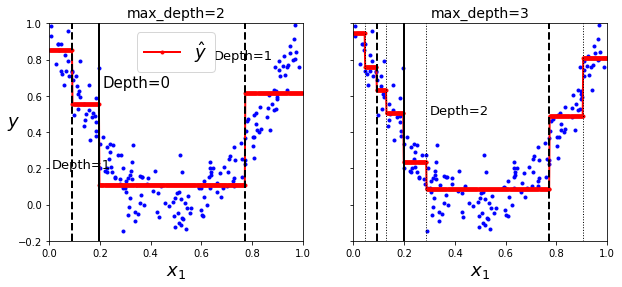

In [18]:
fig

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE (mean squared error).

Just like with classification tasks, Decision Trees are prone to overfitting.

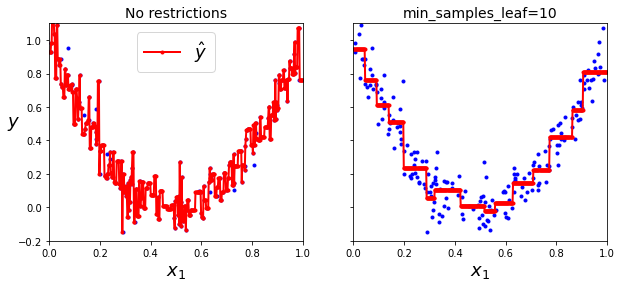

In [19]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14);

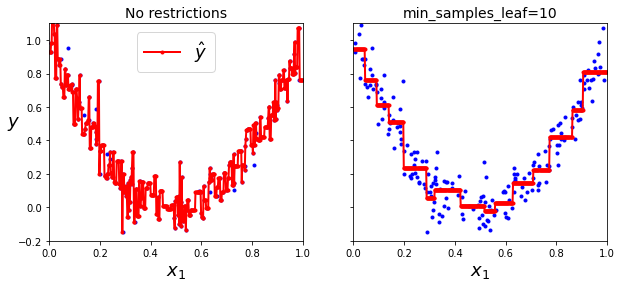

In [20]:
fig

# Ensemble Learning | Random Forests

* ask many people a complex question and aggregate their answers - the **wisdom of the crowds**
* aggregate the predictions of a group of predictors (classifiers or regressors) --> better predictions than the best individual predictor
* a group of predictors is called an **ensemble**; the technique is called **ensemble learning**
* e.g., you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the indivisual trees, then predict the class that gets the most votes --> **Random Forest**
* the winning solutions in ML competitions often involve ensemble methods

## Voting classifiers

* we have trained a few classifiers, each one achieving about 80% accuracy
* we can create an even better classifier is to aggreagte the predictions of each classifier and predict the class that gets the most votes
* this is called a **hard voting classifier**

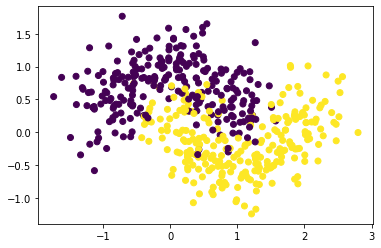

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y);

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector classification

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [23]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [24]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### Diversity is good!

Ensemble methods work best when the predictors are as independent from another as possible. One way to get diverse classifiers is to train them using very different algorithms.

## Bagging

Another approach to get different classifiers is to to train the same algorithm (e.g., Decision Tree) on different subsets of the training data. When sampling is performed with replacement, this method is called **bagging** (= bootstrap aggregating). Sampling without replacement is called **pasting**.

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [27]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


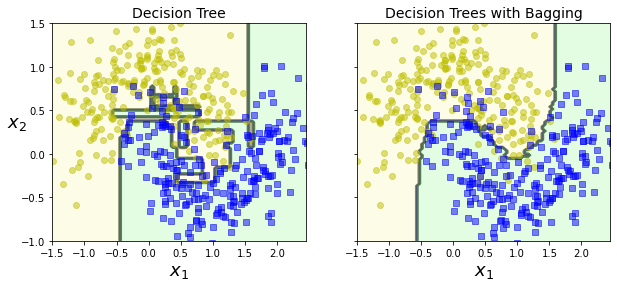

In [28]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("");

## Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with `max_samples` set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class.

In [29]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average. You can access this result using the `feature_importances_` variable.

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


## Random Forests: Predicting global sand composition

This section is based on the paper ["Machine Learning Applied to a Modern-Pleistocene Petrographic Data Set: The Global Prediction of Sand Modal Composition (GloPrSM) Model"](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2022JF006595) by Johnson et al., 2022.

Q (quartz), F (feldspar), and L (lithic or rock fragments) are the main components of sand-size sediment. The goal of this exercise is to see whether we can predict these components based on the characteristics of the watershed that the sand is coming from. The input data for the model is a dataframe of 3202 sand compositions that were obtained through point counting. The goal is to build a model that can predict sand composition in places where we have no sand composition data from. Ideally we should be able to make a map showing the composition of sands everywhere.


<img src = "https://agupubs.onlinelibrary.wiley.com/cms/asset/7e236b34-e40a-4076-abd4-e70958c15d26/jgrf21581-fig-0003-m.jpg" />

In [33]:
import pandas as pd

rf_data = pd.read_csv('GloPrSM_Input_v1.0.csv')
rf_data.head() 

# this dataset is available from: https://www.dropbox.com/s/f9ye6dqmwgodfr9/GloPrSM_Input_v1.0.csv

,Sample_ID,Age,Depo_env,Latitude,Longitude,Location_approximate,Source_ID,Qch_as_Qp,GaDi,Q_undiff,...,Pre_mm_AVG,Tmp_dc_AVG,Slope_AVG,Lith_PYVAVI,Lith_PAPI,Lith_VB,Lith_PB,Lith_EVSC,Lith_SMSSSU,Lith_MT
0,0033S,Modern,littoral,31.7842,34.6236,NaN,Garzanti et al. (2015) Quaternary Science Reviews,0.0,1.0,0,...,532.946953,24.831413,20.278968,0.011031,0.000038,0.080033,0.0,0.068619,0.534249,0.306031
1,0996S,Modern,littoral,32.0817,34.7667,NaN,Garzanti et al. (2015) Quaternary Science Reviews,0.0,1.0,0,...,532.962105,24.827713,20.303717,0.011024,0.000038,0.079982,0.0,0.068926,0.534193,0.305837
2,0997S,Modern,fluvial,32.0853,34.7842,NaN,Garzanti et al. (2015) Quaternary Science Reviews,0.0,1.0,0,...,547.050736,19.012930,62.705401,0.000000,0.000000,0.000000,0.0,0.662295,0.337705,0.000000
3,0998S,Modern,littoral,32.3081,34.8425,NaN,Garzanti et al. (2015) Quaternary Science Reviews,0.0,1.0,0,...,532.960354,24.827402,20.303239,0.011023,0.000038,0.079977,0.0,0.068927,0.534218,0.305817
4,0999S,Modern,littoral,32.3942,34.8653,NaN,Garzanti et al. (2015) Quaternary Science Reviews,0.0,1.0,0,...,532.966237,24.825815,20.311959,0.011020,0.000038,0.079953,0.0,0.069072,0.534192,0.305725


In [34]:
rf_data.columns

Index(['Sample_ID', 'Age', 'Depo_env', 'Latitude', 'Longitude',
       'Location_approximate', 'Source_ID', 'Qch_as_Qp', 'GaDi', 'Q_undiff',
       'Raw_as_pct', 'Ternary_vals', 'N', 'Q_QFL_EG', 'F_QFL_EG', 'L_QFL_EG',
       'Q_QFL_WD', 'F_QFL_WD', 'L_QFL_WD', 'Qm_QmFLt_WD', 'F_QmFLt_WD',
       'Lt_QmFLt_WD', 'Q_QFL_IJ', 'F_QFL_IJ', 'L_QFL_IJ', 'Qm_QmQpQch_IJ',
       'Qp_QmQpQch_IJ', 'Qch_QmQpQch_IJ', 'Fk_FpFk_IJ', 'Fp_FpFk_IJ',
       'Lv_LvLsLm_IJ', 'Ls_LvLsLm_IJ', 'Lm_LvLsLm_IJ', 'Qm_Great8_IJ',
       'Qp_Great8_IJ', 'Qch_Great8_IJ', 'Fk_Great8_IJ', 'Fp_Great8_IJ',
       'Lv_Great8_IJ', 'Ls_Great8_IJ', 'Lm_Great8_IJ', 'FQ_QFL_IJ',
       'LQ_QFL_IJ', 'QmQch_QmQpQch_IJ', 'QpQch_QmQpQch_IJ', 'FkFp_FpFk_IJ',
       'LsLv_LvLsLm_IJ', 'LmLv_LvLsLm_IJ', 'Relief_AVG', 'Area_sq_km',
       'Pre_mm_AVG', 'Tmp_dc_AVG', 'Slope_AVG', 'Lith_PYVAVI', 'Lith_PAPI',
       'Lith_VB', 'Lith_PB', 'Lith_EVSC', 'Lith_SMSSSU', 'Lith_MT'],
      dtype='object')

In [35]:
rf_data.shape

(3202, 60)

#### These are the features we are going to use:

* Relief_AVG : Average topographic elevation (m)
* Area_sq_km : Area (square km)
* Pre_mm_AVG : Average precipitation (mm) (pre_mm_syr from BasinATLAS dataset)
* Tmp_dc_AVG : Average temperature (degrees C) (tmp_dc_syr_tempCorrected from BasinATLAS dataset)
* Slope_AVG : Average slope (degrees x10) (slp_dg_sav from BasinATLAS dataset)
* Lith_PYVAVI : Normalized proportion of catchment area that is PY+VA+VI (0 to 1) (GLiM; Hartmann and Moosdorf (2012): Geochemistry, Geophysics, Geosystems)
* Lith_PAPI : Normalized proportion of catchment area that is PA+PI (0 to 1) (GLiM; Hartmann and Moosdorf (2012): Geochemistry, Geophysics, Geosystems)
* Lith_VB : Normalized proportion of catchment area that is VB (0 to 1) (GLiM; Hartmann and Moosdorf (2012): Geochemistry, Geophysics, Geosystems)
* Lith_PB : Normalized proportion of catchment area that is PB (0 to 1) (GLiM; Hartmann and Moosdorf (2012): * Geochemistry, Geophysics, Geosystems)
* Lith_EVSC : Normalized proportion of catchment area that is EV+SC (0 to 1) (GLiM; Hartmann and Moosdorf (2012): Geochemistry, Geophysics, Geosystems)
* Lith_SMSSSU : Normalized proportion of catchment area that is SM+SS+SU (0 to 1) (GLiM; Hartmann and Moosdorf (2012): Geochemistry, Geophysics, Geosystems)
* Lith_MT : Normalized proportion of catchment area that is MT (0 to 1) (GLiM; Hartmann and Moosdorf (2012): Geochemistry, Geophysics, Geosystems)

<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/johnson_et_al_predictors.jpg" width="800">

Hartmann and Moosdorf (2012), The new global lithological map database GLiM: A representation of rock properties at the Earth surface - [link](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GC004370)

In [36]:
feature_list = ['Relief_AVG', 'Area_sq_km', 'Pre_mm_AVG', 'Tmp_dc_AVG', 'Slope_AVG', 'Lith_PYVAVI',
                'Lith_PAPI', 'Lith_VB', 'Lith_PB', 'Lith_EVSC', 'Lith_SMSSSU', 'Lith_MT']
features = rf_data[feature_list]
features.head()

,Relief_AVG,Area_sq_km,Pre_mm_AVG,Tmp_dc_AVG,Slope_AVG,Lith_PYVAVI,Lith_PAPI,Lith_VB,Lith_PB,Lith_EVSC,Lith_SMSSSU,Lith_MT
0,704.441261,4.094230e+06,532.946953,24.831413,20.278968,0.011031,0.000038,0.080033,0.0,0.068619,0.534249,0.306031
1,704.182884,4.096372e+06,532.962105,24.827713,20.303717,0.011024,0.000038,0.079982,0.0,0.068926,0.534193,0.305837
2,331.888158,1.782017e+03,547.050736,19.012930,62.705401,0.000000,0.000000,0.000000,0.0,0.662295,0.337705,0.000000
3,704.148414,4.097345e+06,532.960354,24.827402,20.303239,0.011023,0.000038,0.079977,0.0,0.068927,0.534218,0.305817
4,704.004630,4.098678e+06,532.966237,24.825815,20.311959,0.011020,0.000038,0.079953,0.0,0.069072,0.534192,0.305725


#### These are the labels we are trying to predict:

* **Q_QFL_EG # Q% (Q-F-L)** using scheme of Garzanti (2019): Earth-Science Reviews
* F_QFL_EG : F% (Q-F-L) using scheme of Garzanti (2019): Earth-Science Reviews
* L_QFL_EG : L% (Q-F-L) using scheme of Garzanti (2019): Earth-Science Reviews

In [37]:
labels = ['Q_QFL_EG', 'F_QFL_EG', 'L_QFL_EG']

Let's focus on predicting the quartz (Q) content first; and let's start with exploring some of the variables. 

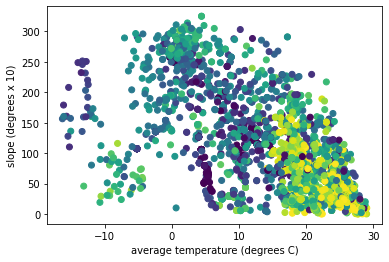

In [38]:
plt.figure()
plt.scatter(rf_data['Tmp_dc_AVG'], rf_data['Slope_AVG'], c = rf_data['Q_QFL_EG'])
plt.xlabel('average temperature (degrees C)')
plt.ylabel('slope (degrees x 10)');

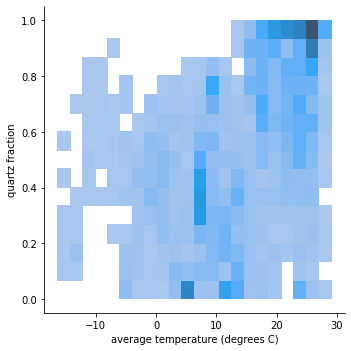

In [39]:
import seaborn as sns
ax = sns.displot(rf_data, x='Tmp_dc_AVG', y='Q_QFL_EG')
ax.set(xlabel='average temperature (degrees C)', ylabel='quartz fraction');

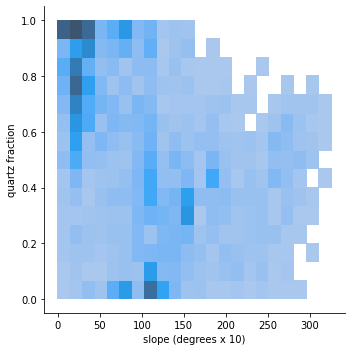

In [40]:
ax = sns.displot(rf_data, x='Slope_AVG', y='Q_QFL_EG')
ax.set(xlabel='slope (degrees x 10)', ylabel='quartz fraction');

We need to drop the rows that have no data in the 'Q_QFL_EG' column:

In [41]:
rf_data = rf_data[rf_data[labels[0]].isnull()==False].reset_index()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(rf_data.loc[:, feature_list], 
                                                    rf_data.loc[:, labels[0]], test_size=0.2, random_state=0)

In [43]:
X_train.shape # 2401 samples, 12 features

(2401, 12)

In [44]:
X_test.shape # 601 samples, 12 features

(601, 12)

In [45]:
y_train.shape # 2401 targets

(2401,)

### Linear Regression

Let's try first a simple linear regression model. This is unlikely to capture the nonlinear relations between the variables in this dataset.

In [46]:
from sklearn.linear_model import LinearRegression # import model class
from sklearn.metrics import r2_score
model_LR = LinearRegression() # create model instance
model_LR.fit(X_train, y_train) # train model
prediction_LR = model_LR.predict(X_test) # make predictions
print(r2_score(y_test, prediction_LR)) # check testing R2 score

0.5090497149468844


In [47]:
print(r2_score(y_train, model_LR.predict(X_train)))  # training R2 score

0.48521816315226307


The training score is fairly low and similar to the validation score; this is a case of underfitting / high bias / low variance. We need to select a model that is more capable of capturing the complex relations between the variables in this dataset.

### Decision Tree

Next, let's use a Decision Tree and see how well it performs.

In [48]:
model_DT = DecisionTreeRegressor(random_state = 0, max_depth = 30)
model_DT.fit(X_train, y_train) 
prediction_DT = model_DT.predict(X_test) # make predictions
print(r2_score(y_test, prediction_DT)) # check R2 score

0.613916103715989


The score has improved significantly from the linear model, but there is still room for improvement.

### Random Forest Regression

A random forest model is more likely to perform well with a dataset like this. This is what they used in the paper.

In [49]:
from sklearn.ensemble import RandomForestRegressor # import model class
model_RF = RandomForestRegressor(n_estimators=len(rf_data), random_state=0) # create model instance
model_RF.fit(X_train, y_train) # train model -- this takes a while
prediction_RF = model_RF.predict(X_test) # make predictions
print(r2_score(y_test, prediction_RF)) # check R2 score

0.7687252277718029


You might be wondering what is the depth of the trees in `model_RF`...

In [50]:
[estimator.get_depth() for estimator in model_RF.estimators_][:10]

[35, 30, 32, 32, 27, 29, 26, 28, 27, 27]

The random forest model in Scikit-Learn allows us to check the importance of individual features, through the use of the `feature_importances_` attribute:

In [51]:
for name, score in zip(feature_list, model_RF.feature_importances_):
    print("{:12s}".format(name), "{:10.3f}".format(score))

Relief_AVG        0.052
Area_sq_km        0.052
Pre_mm_AVG        0.070
Tmp_dc_AVG        0.394
Slope_AVG         0.117
Lith_PYVAVI       0.056
Lith_PAPI         0.023
Lith_VB           0.067
Lith_PB           0.009
Lith_EVSC         0.051
Lith_SMSSSU       0.030
Lith_MT           0.080


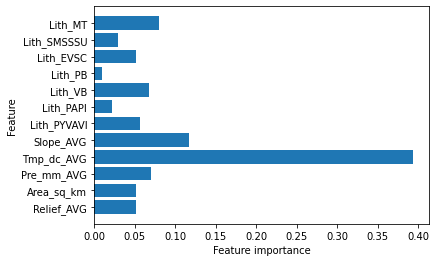

In [52]:
n_features = model_RF.n_features_in_
plt.barh(np.arange(n_features), model_RF.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_list)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);

We can see that the average temperature in the watershed is by far the most important variable; the higher the temperature, the more likely is that feldspar and rock fragments break down and the sand is enriched in quartz. The next most important variable is slope (low slope --> more quartz).

### Make predictions for South America

Next we load global watershed data and create a map of South America  showing the predicted quartz content.

In [53]:
wtrshd_data = pd.read_csv('Watershed_output_lv8_ML_input.csv', index_col = 0)
wtrshd_data.head()

# this dataset is available from: https://www.dropbox.com/s/iqxun28mzujtynn/Watershed_output_lv8_ML_input.csv

,Wtrshd_ID,Relief_AVG,Lith_MT,Lith_EVSC,Lith_PB,Lith_PYVAVI,Lith_PAPI,Lith_VB,Lith_SMSSSU,Area_sq_km,Pre_mm_AVG,Tmp_dc_AVG,Slope_AVG
0,1080000010,258.421553,0.0,0.731942,0.0,0.0,0.0,0.0,0.268058,1890.8,23.697017,21.194191,39.324961
1,1080000100,592.624230,0.0,0.932990,0.0,0.0,0.0,0.0,0.067010,2925.8,29.266940,19.171150,53.624230
2,1080173620,566.435088,0.0,0.940281,0.0,0.0,0.0,0.0,0.059719,2572.2,28.160234,19.347368,46.469006
3,1080173880,814.157895,0.0,0.918919,0.0,0.0,0.0,0.0,0.081081,336.5,38.280702,17.699125,109.552632
4,1080174070,769.330789,0.0,0.964286,0.0,0.0,0.0,0.0,0.035714,1183.9,34.053435,18.059288,64.048346


For predictions, we only need the features we used when building our model:

In [54]:
wtrshd_data.loc[:, feature_list].head()

,Relief_AVG,Area_sq_km,Pre_mm_AVG,Tmp_dc_AVG,Slope_AVG,Lith_PYVAVI,Lith_PAPI,Lith_VB,Lith_PB,Lith_EVSC,Lith_SMSSSU,Lith_MT
0,258.421553,1890.8,23.697017,21.194191,39.324961,0.0,0.0,0.0,0.0,0.731942,0.268058,0.0
1,592.624230,2925.8,29.266940,19.171150,53.624230,0.0,0.0,0.0,0.0,0.932990,0.067010,0.0
2,566.435088,2572.2,28.160234,19.347368,46.469006,0.0,0.0,0.0,0.0,0.940281,0.059719,0.0
3,814.157895,336.5,38.280702,17.699125,109.552632,0.0,0.0,0.0,0.0,0.918919,0.081081,0.0
4,769.330789,1183.9,34.053435,18.059288,64.048346,0.0,0.0,0.0,0.0,0.964286,0.035714,0.0


Now we can make predictions for all the rows in this dataframe, e.g.:

In [55]:
model_RF.predict(wtrshd_data.loc[:, feature_list].iloc[:5]) # quartz content for first 5 rows

array([0.6064068 , 0.67515654, 0.68027314, 0.44334145, 0.56495651])

To make a map, we need the shapefiles for the watersheds in South America. We can get these from the ['BasinATLAS'](https://www.hydrosheds.org/hydroatlas) global data set of fluvial watersheds.

In [56]:
#!pip install geemap
#import os
#import geemap
#import pandas as pd

In [57]:
!pip install click~=8.0
!pip install fiona
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 60.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 

In [58]:
import geopandas # need to install geopandas for this


# this dataset is available from: https://www.dropbox.com/s/kizb4ewn94p12sf/Basin_ATLAS_V10_S_America.zip

In [59]:
s_america = geopandas.read_file('Basin_ATLAS_V10_S_America.shp')

In [60]:
type(s_america)

geopandas.geodataframe.GeoDataFrame

In [61]:
s_america.head()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,...,hft_ix_s93,hft_ix_u93,hft_ix_s09,hft_ix_u09,gad_id_smj,gdp_ud_sav,gdp_ud_ssu,gdp_ud_usu,hdi_ix_sav,geometry
0,6080000010,0,6080000010,6080000010,0.0,0.0,222.1,222.5,61100101,0,...,93,93,63,70,173,29422,83093512,83093512,788,"MULTIPOLYGON (((-79.26667 9.42500, -79.26720 9..."
1,6080000020,0,6080000020,6080000020,0.0,0.0,335.7,335.7,61100102,0,...,58,58,43,43,173,32102,177727968,177727952,788,"POLYGON ((-79.07500 9.47083, -79.06667 9.47083..."
2,6080000030,0,6080000030,6080000030,0.0,0.0,2410.7,2410.7,61100103,0,...,51,108,60,58,173,19375,602035520,2367957,786,"MULTIPOLYGON (((-78.99722 9.45417, -79.00478 9..."
3,6080000130,0,6080000130,6080000130,0.0,0.0,264.4,264.5,61100104,0,...,34,34,67,67,52,5662,8086850,8086850,729,"MULTIPOLYGON (((-77.40833 8.58333, -77.41307 8..."
4,6080000140,0,6080000140,6080000140,0.0,0.0,12.0,12.1,61100105,0,...,35,52,45,62,52,5660,5530208,5530208,727,"POLYGON ((-77.31667 8.45417, -77.32140 8.45538..."


In [62]:
s_america.shape

(23838, 295)

In [63]:
wtrshd_data = wtrshd_data.rename(columns={"Wtrshd_ID": "HYBAS_ID"}) # rename column

We need to get the model features into the same dataframe where the watershed polygons are. In order to do this, we do a right merge (use only keys from right frame) on the 'wtrshd_data' dataframe, using the unique watershed ID column:

In [64]:
s_america = wtrshd_data.merge(s_america, how = 'right', on = 'HYBAS_ID')

Unfortunately this merge operation transformed `s_america` into a simple dataframe. We need to convert it back into a geodataframe:

In [65]:
type(s_america)

pandas.core.frame.DataFrame

In [66]:
s_america = geopandas.GeoDataFrame(s_america, geometry = s_america['geometry'])

It is easy to make a map from a geodataframe, e.g.:

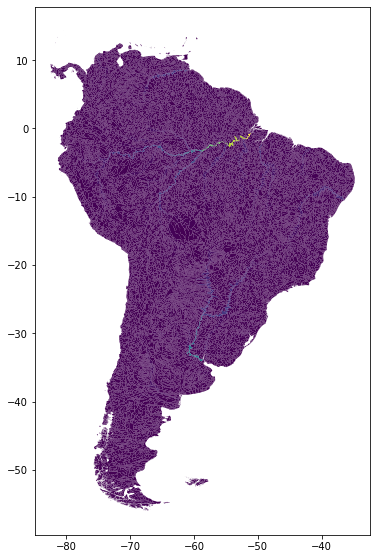

In [67]:
fig, ax = plt.subplots(figsize = (6, 10))
s_america.plot('Area_sq_km', ax=ax);

Before making predictions of the quartz content, we need to get rid of rows with missing feature data:

In [68]:
s_america = s_america.dropna(subset=feature_list) 

In [69]:
s_america.loc[:, 'Q'] = model_RF.predict(s_america.loc[:, feature_list]) # making the prediction

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Now we are ready to make the map of quartz content!

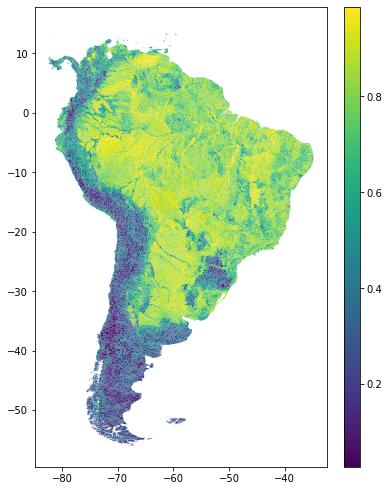

In [70]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize = (6, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
s_america.plot(column='Q', ax=ax, legend=True, cax=cax);

(-11.0, -10.0)

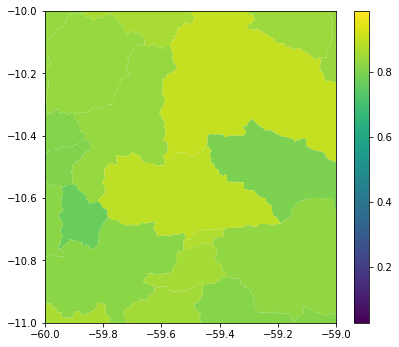

In [71]:
# zoom in a bit

fig, ax = plt.subplots(1, 1, figsize = (6, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
s_america.plot(column='Q', ax=ax, legend=True, cax=cax)
ax.set_xlim(-60, -59)
ax.set_ylim(-11, -10)

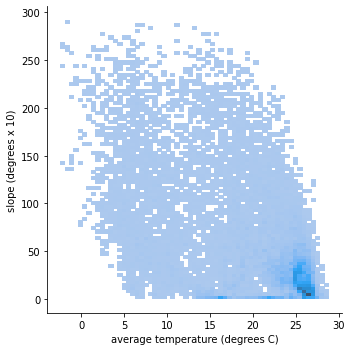

In [72]:
ax = sns.displot(s_america, x='Tmp_dc_AVG', y='Slope_AVG')
ax.set(xlabel='average temperature (degrees C)', ylabel='slope (degrees x 10)');

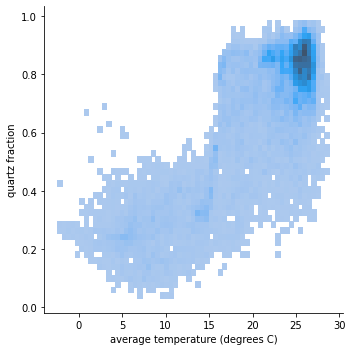

In [73]:
ax = sns.displot(s_america, x='Tmp_dc_AVG', y='Q')
ax.set(xlabel='average temperature (degrees C)', ylabel='quartz fraction');

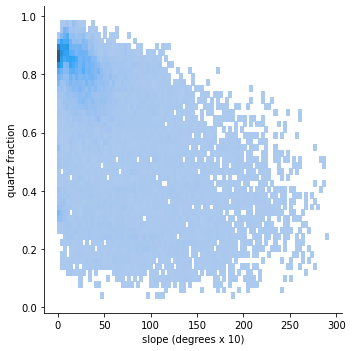

In [74]:
ax = sns.displot(s_america, x='Slope_AVG', y='Q')
ax.set(xlabel='slope (degrees x 10)', ylabel='quartz fraction');

### Global sand composition maps from the [Johnson et al. paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2022JF006595)

<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/johnson_et_al_qfl_maps.jpg" width="1200">


### Ternary QFL map
<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/johnson_et_al_qfl_map.jpg" width="1200">

### Fraction of plagioclase feldspar
<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/johnson_et_al_plagioclase.jpg" width="1200">

### Hyperparameter tuning: GridSearchCV

Scikit-Learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter. Let's look at an example from the 'moons' synthetic dataset. By default `GridSearchCV` uses five-fold cross validation to evaluate the models.

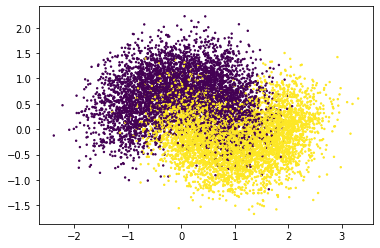

In [75]:
from sklearn.model_selection import GridSearchCV

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=2);

In [76]:
X[:,0]

array([ 0.9402914 ,  0.12454026,  0.26198823, ..., -0.24177973,
        0.90679645,  2.08837082])

In [77]:
X[:,1]

array([ 0.12230559, -0.42477546,  0.50841438, ...,  0.20957199,
        0.54958215, -0.05050728])

In [78]:
X

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [79]:
type(X)

numpy.ndarray

In [80]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [81]:
type(y)

numpy.ndarray

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
parameters = {'min_samples_split':[2, 4, 6, 8, 10], 
              'max_leaf_nodes':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'max_depth':[5, 10, 15, 20, 25, 30]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, scoring='accuracy', refit=True)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_leaf_nodes': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                            90, 100],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [83]:
print('Training: ', X_train.shape, y_train.shape)
print('Testing: ', X_test.shape, y_test.shape)

Training:  (7500, 2) (7500,)
Testing:  (2500, 2) (2500,)


In [84]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_leaf_nodes',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

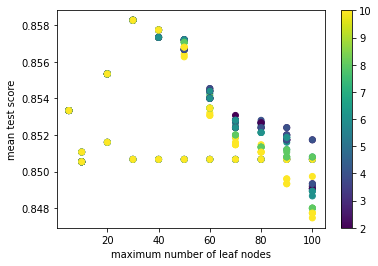

In [85]:
plt.scatter([mln['max_leaf_nodes'] for mln in clf.cv_results_['params']], clf.cv_results_['mean_test_score'], 
           c = [mln['min_samples_split'] for mln in clf.cv_results_['params']])
plt.colorbar()
plt.xlabel('maximum number of leaf nodes')
plt.ylabel('mean test score');

In [86]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30)

In [87]:
clf.best_score_

0.8582666666666666

In [88]:
clf.best_params_

{'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_split': 2}

In [89]:
inds = np.where(clf.cv_results_['mean_test_score'] == clf.best_score_)[0]

In [90]:
np.array([mln['max_leaf_nodes'] for mln in clf.cv_results_['params']])[[inds]]

<ipython-input-90-08ead0e3ea5e>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.array([mln['max_leaf_nodes'] for mln in clf.cv_results_['params']])[[inds]]


array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30])

In [91]:
# check accuracy on test data:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8636

In [92]:
X_test.shape

(2500, 2)

In [93]:
y_pred.shape

(2500,)

In [94]:
y_test.shape

(2500,)

## Task 1
Load the log dataset that we worked on in the 'Classification' session and use `GridSearchCV` to tune the parameters `min_samples_split`, `max_depth`, and `max_leaf_nodes` for a decision tree classifier that uses a number of logs (more than two) to predict the facies.

In [95]:
# load data from CSV file
url = 'https://raw.githubusercontent.com/seg/2016-ml-contest/master/facies_vectors.csv'
data = pd.read_csv(url)
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [96]:
y_task1_2 = data.Facies

In [97]:
y_task1_2

0       3
1       3
2       3
3       3
4       3
       ..
4144    5
4145    5
4146    5
4147    5
4148    5
Name: Facies, Length: 4149, dtype: int64

In [98]:
type(y_task1_2)

pandas.core.series.Series

In [99]:
x_task1_2 = data.drop(columns=['Facies', 'Formation', 'Well Name', 'PE'])

In [100]:
x_task1_2

,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS
0,2793.0,77.450,0.664,9.900,11.915,1,1.000
1,2793.5,78.260,0.661,14.200,12.565,1,0.979
2,2794.0,79.050,0.658,14.800,13.050,1,0.957
3,2794.5,86.100,0.655,13.900,13.115,1,0.936
4,2795.0,74.580,0.647,13.500,13.300,1,0.915
...,...,...,...,...,...,...,...
4144,3120.5,46.719,0.947,1.828,7.254,2,0.685
4145,3121.0,44.563,0.953,2.241,8.013,2,0.677
4146,3121.5,49.719,0.964,2.925,8.013,2,0.669
4147,3122.0,51.469,0.965,3.083,7.708,2,0.661


In [101]:
type(x_task1_2)

pandas.core.frame.DataFrame

In [102]:
X_train_task1_2, X_test_task1_2, y_train_task1_2, y_test_task1_2 = train_test_split(x_task1_2, y_task1_2, random_state=42)

In [103]:
print('Training: ', X_train_task1_2.shape, y_train_task1_2.shape)
print('Testing: ', X_test_task1_2.shape, y_test_task1_2.shape)

Training:  (3111, 7) (3111,)
Testing:  (1038, 7) (1038,)


In [104]:
parameters = {'min_samples_split':[2, 4, 6, 8, 10], 
              'max_leaf_nodes':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'max_depth':[5, 10, 15, 20, 25, 30]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, scoring='accuracy', refit=True)

In [105]:
X_train_task1_2

,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS
2412,2637.5,61.178,0.899164,3.900,10.350,1,0.803
1553,2694.0,44.360,1.025000,-0.700,5.450,2,0.652
1207,2913.5,61.560,0.354000,0.600,17.815,1,0.396
3769,2929.5,39.594,1.003000,-1.041,6.217,2,0.946
3201,3060.5,48.438,0.913000,1.534,8.329,2,0.500
...,...,...,...,...,...,...,...
3444,2907.0,15.770,0.932000,1.000,7.100,2,0.868
466,3026.0,17.920,0.808000,1.500,9.730,2,0.049
3092,3006.0,106.625,0.172000,2.035,16.374,2,0.417
3772,2931.0,39.875,0.939000,-1.698,5.214,2,0.913


In [106]:
y_train_task1_2

2412    2
1553    8
1207    1
3769    8
3201    4
       ..
3444    8
466     8
3092    8
3772    6
860     5
Name: Facies, Length: 3111, dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [108]:
X_train_task1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 2412 to 860
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      3111 non-null   float64
 1   GR         3111 non-null   float64
 2   ILD_log10  3111 non-null   float64
 3   DeltaPHI   3111 non-null   float64
 4   PHIND      3111 non-null   float64
 5   NM_M       3111 non-null   int64  
 6   RELPOS     3111 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 194.4 KB


In [109]:
X_train_task1_2

,Depth,GR,ILD_log10,DeltaPHI,PHIND,NM_M,RELPOS
2412,2637.5,61.178,0.899164,3.900,10.350,1,0.803
1553,2694.0,44.360,1.025000,-0.700,5.450,2,0.652
1207,2913.5,61.560,0.354000,0.600,17.815,1,0.396
3769,2929.5,39.594,1.003000,-1.041,6.217,2,0.946
3201,3060.5,48.438,0.913000,1.534,8.329,2,0.500
...,...,...,...,...,...,...,...
3444,2907.0,15.770,0.932000,1.000,7.100,2,0.868
466,3026.0,17.920,0.808000,1.500,9.730,2,0.049
3092,3006.0,106.625,0.172000,2.035,16.374,2,0.417
3772,2931.0,39.875,0.939000,-1.698,5.214,2,0.913


In [110]:
clf.fit(X_train_task1_2, y_train_task1_2)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_leaf_nodes': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                            90, 100],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [111]:
print('Training: ', X_train_task1_2.shape, y_train_task1_2.shape)
print('Testing: ', X_test_task1_2.shape, y_test_task1_2.shape)

Training:  (3111, 7) (3111,)
Testing:  (1038, 7) (1038,)


In [112]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_leaf_nodes',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

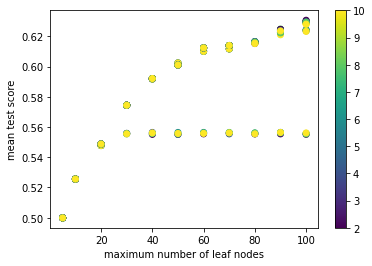

In [113]:
plt.scatter([mln['max_leaf_nodes'] for mln in clf.cv_results_['params']], clf.cv_results_['mean_test_score'], 
           c = [mln['min_samples_split'] for mln in clf.cv_results_['params']])
plt.colorbar()
plt.xlabel('maximum number of leaf nodes')
plt.ylabel('mean test score');

In [114]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=100)

In [115]:
clf.best_score_

0.6306699767229411

In [116]:
clf.best_params_

{'max_depth': 25, 'max_leaf_nodes': 100, 'min_samples_split': 2}

In [117]:
inds = np.where(clf.cv_results_['mean_test_score'] == clf.best_score_)[0]

In [118]:
np.array([mln['max_leaf_nodes'] for mln in clf.cv_results_['params']])[[inds]]

<ipython-input-118-08ead0e3ea5e>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.array([mln['max_leaf_nodes'] for mln in clf.cv_results_['params']])[[inds]]


array([100])

In [119]:
# check accuracy on test data:
y_pred = clf.predict(X_test_task1_2)

In [120]:
X_test_task1_2.shape

(1038, 7)

In [121]:
y_pred.shape

(1038,)

In [122]:
y_test_task1_2.shape

(1038,)

In [123]:
accuracy_score(y_test_task1_2, y_pred)

0.630057803468208

## Task 2

* Create and train a random forest classifier to predict facies using the same features as in Task 1. How much improvement do you see in the accuracy relative to the decision tree model in Task 1?
* In the quartz fraction prediction exercise, we used the same number of estimators as the number of samples. Is this a good parameter setting? Can we get away with fewer trees?

In [124]:
rnd_clf_task2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [125]:
rnd_clf_task2.fit(X_train_task1_2, y_train_task1_2)

RandomForestClassifier(random_state=42)

In [126]:
y_pred_task2 = rnd_clf_task2.predict(X_test_task1_2)

In [127]:
accuracy_score(y_test_task1_2, y_pred_task2)

0.7764932562620424

Not much imporvement here, only ~5% improvement

In [128]:
rnd_clf_task2_2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=2, random_state=42)

In [129]:
rnd_clf_task2_2.fit(X_train_task1_2, y_train_task1_2)

RandomForestClassifier(max_leaf_nodes=2, n_estimators=500, random_state=42)

In [130]:
y_pred_task2_2 = rnd_clf_task2_2.predict(X_test_task1_2)

In [131]:
accuracy_score(y_test_task1_2, y_pred_task2_2)

0.37090558766859344

No, "n_estimators=100, random_state=42" gives ~2 times better result.

## Task 3

Use the same features as in the quartz prediction exercise above to 

* explore the relationships between the predictors using seaborn's [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.
* train a random forest regressor to predict the feldspar (F) fraction in sands in South America.
* make a map of South America showing the predicted feldspar fraction in sands.

You will need to install [geopandas](https://geopandas.org/en/stable/) to ba able to make maps.

In [132]:
!pip install click~=8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


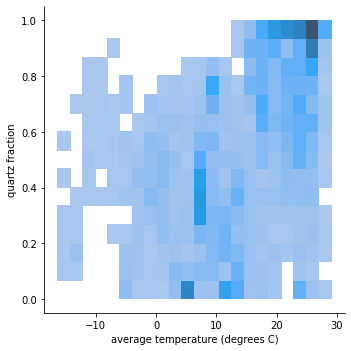

In [135]:
import seaborn as sns
ax = sns.displot(rf_data, x='Tmp_dc_AVG', y='Q_QFL_EG')
ax.set(xlabel='average temperature (degrees C)', ylabel='quartz fraction');

In [136]:
type(rf_data)

pandas.core.frame.DataFrame

In [152]:
rf_data_task3_1 = rf_data.loc[:, ['Tmp_dc_AVG', 'F_QFL_EG']]

In [153]:
rf_data_task3_1

,Tmp_dc_AVG,F_QFL_EG
0,24.831413,0.183333
1,24.827713,0.196808
2,19.012930,0.040359
3,24.827402,0.157518
4,24.825815,0.142857
...,...,...
2997,5.600000,0.446009
2998,6.000000,0.635317
2999,5.699999,0.293598
3000,4.757143,0.171779


In [154]:
type(rf_data_task3_1)

pandas.core.frame.DataFrame

In [155]:
pivot_1 = rf_data_task3_1.pivot_table(index='F_QFL_EG', columns='Tmp_dc_AVG', aggfunc=len, fill_value=0)

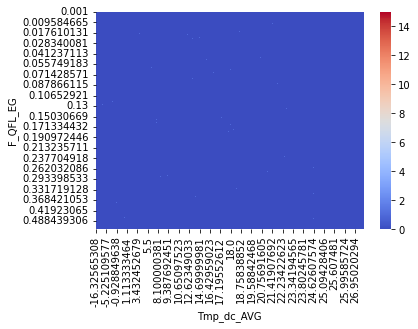

In [156]:
sns.heatmap(pivot_1, cmap='coolwarm')

In [158]:
rf_data_task3_2 = rf_data.loc[:, ['Slope_AVG', 'F_QFL_EG']]

In [159]:
pivot_2 = rf_data_task3_2.pivot_table(index='F_QFL_EG', columns='Slope_AVG', aggfunc=len, fill_value=0)

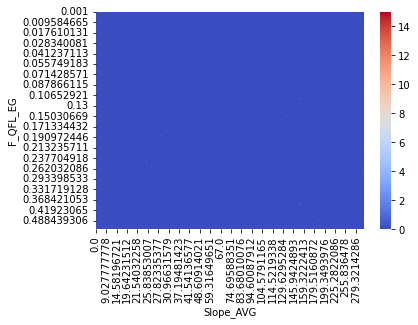

In [160]:
sns.heatmap(pivot_2, cmap='coolwarm')

train a random forest regressor to predict the feldspar (F) fraction in sands in South America.

In [168]:
rf_data_f = rf_data[rf_data[labels[1]].isnull()==False].reset_index()
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(rf_data_f.loc[:,feature_list], rf_data_f.loc[:,labels[1]], test_size =0.2, random_state =0)
print(X_train_f.shape)
print(X_test_f.shape)
print(y_train_f.shape)
print(y_test_f.shape)

(2401, 12)
(601, 12)
(2401,)
(601,)


In [169]:
model_RF_f = RandomForestRegressor(n_estimators=len(rf_data_f), random_state=0) # create model instance
model_RF_f.fit(X_train_f, y_train_f) # train model -- this takes a while
prediction_RF_f = model_RF_f.predict(X_test_f) # make predictions
print(r2_score(y_test_f, prediction_RF_f)) # check R2 score

0.6211313762015993


In [171]:
s_america.loc[:, 'F'] = model_RF_f.predict(s_america.loc[:, feature_list]) # making the prediction

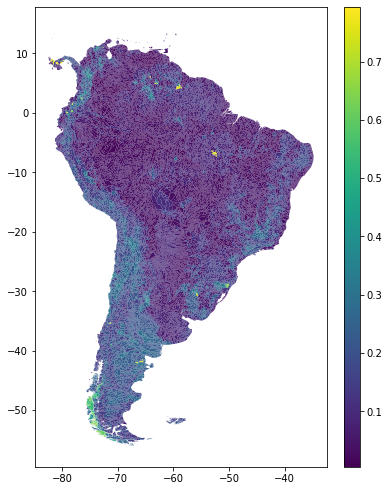

In [172]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize = (6, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
s_america.plot(column='F', ax=ax, legend=True, cax=cax);

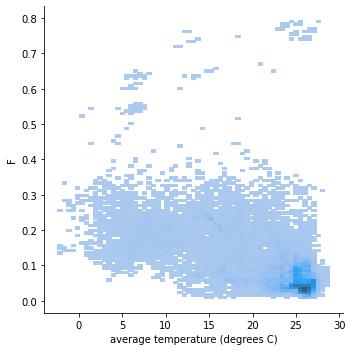

In [173]:
ax = sns.displot(s_america, x='Tmp_dc_AVG', y='F')
ax.set(xlabel='average temperature (degrees C)', ylabel='F');

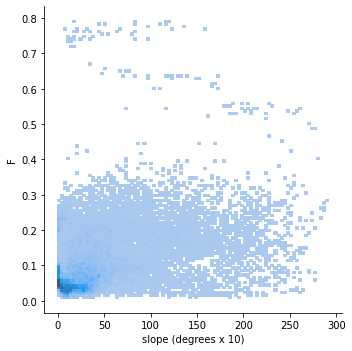

In [174]:
ax = sns.displot(s_america, x='Slope_AVG', y='F')
ax.set(xlabel='slope (degrees x 10)', ylabel='F');

## Bonus question

We used R squared (`r2_score` in Scikit-Learn) to measure the performance of the random forest regression models. How does this R squared relate to the `r` correlation coefficient that is familiar from linear regression?

The R-squared used in regression models is not the same as the Pearson correlation coefficient, r. The Pearson correlation coefficient measures the linear relationship between two variables, ranging from -1 to 1. The R-squared measures the proportion of total variation in the dependent variable explained by independent variables. In linear regression, the square of the Pearson correlation coefficient is equal to the R-squared value. In random forest regression, R-squared measures how well the model fits the data and does not directly relate to the Pearson correlation coefficient.